# Segmentation

_Tiffany Wang 260684152_

### 1.1 K-means clustering and Expectation Maximization

In [1]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt 
import math
from skimage import data, segmentation
from skimage.future import graph
from sklearn.cluster import MeanShift

In [2]:
def plot_figs(imgs, titles=None, max_col=4):
    """
    Plots list of images in a grid. 
    -----
    args imgs: list of images.
    args titles: list of titles, defaults to None.
    args max_col: number of column in the grid, defaults to 4.
    -----
    return: None.
    """
    n = len(imgs)
    
    # Each plot can hold up to 8 images.
    rows_per_set = 8 // max_col 
    fig_per_set = rows_per_set * max_col
    sets = math.ceil(n / fig_per_set)
    
    for s in range(sets):
        # starting index of your set
        start = s * fig_per_set
        
        # compute the number of images and rows in the current set 
        subset_len = min(start+fig_per_set, n) - start
        nb_rows = math.ceil(subset_len / max_col)
        
        # set subplot map 
        subplot = "{}{}".format(nb_rows, max_col)
        plt.figure(figsize=(20, 4 * nb_rows))
        for i in range(subset_len):
            plt.subplot(int("{}{}".format(subplot, i+1)))
            if titles is not None: 
                plt.title(titles[start + i])
            else:
                plt.title(str(start + i + 1))
            plt.axis('off')
            plt.imshow(imgs[start + i].astype(np.uint8))
    plt.show()

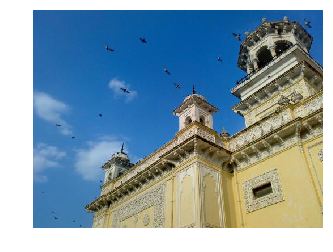

In [3]:
# Read 'home.jpg' picture in RGB.
home = cv2.imread('home.jpg')
home = cv2.cvtColor(home, cv2.COLOR_BGR2RGB)
plt.imshow(home), plt.axis('off')
plt.show()

###### Implement K-means clustering algorithm using only the numpy library. You can use opencv and matplotlib libraries only to read and display images but not for clustering. Apply k-means to the provided image with K=2 and K=3. Display the resulting segmented images for 10 iterations in both cases.

In [4]:
def k_means(img, k, iter=10):
    """
    Performs image segmentation, and plots training evolution at each iteration.
    -----
    args img: the image.
    args k: number of clusters.
    args iter: number of iterations, defaults to 10.
    -----
    return: None.
    """
    h, w, ch = img.shape
    img = img.astype(np.float64)
    
    # Randomly select the k cluster centers. 
    centers = np.random.random_sample((k, ch)) * 255.0
    evol = []
    for it in range(iter):
        # Compute distance between each pixel and cluster center.
        dists = np.array([img - c for c in centers])
        dists = np.linalg.norm(dists, axis=-1)
        
        # Assign pixel to cluster with closest center. 
        clusters = np.argmin(dists, axis=0)
        evol.append(clusters)
        
        # Compute new cluster centers.
        new_c = np.empty(shape=(k,ch))
        for c in range(k):
            np.mean(img[clusters == c], axis=0, out=new_c[c])
        centers = new_c
    
    # Plot evolution.
    plot_figs(evol, max_col=3)

K-means segmentation with two clusters.

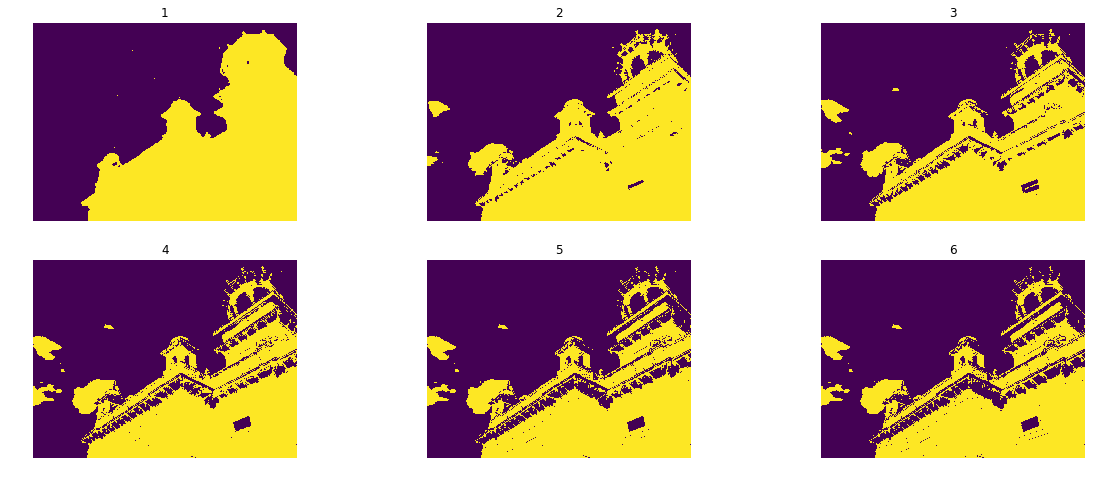

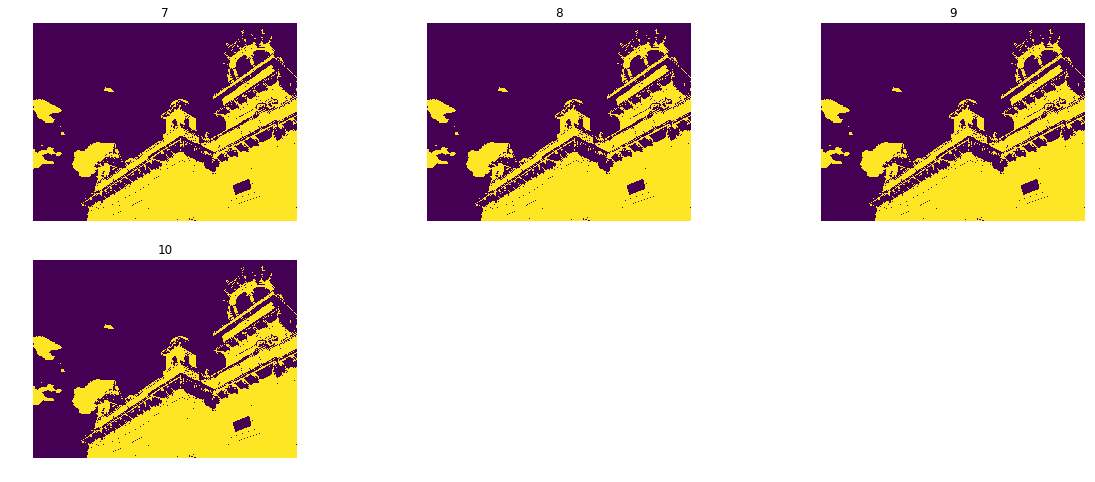

In [5]:
k_means(home, 2)

K-means segmentation with three clusters.

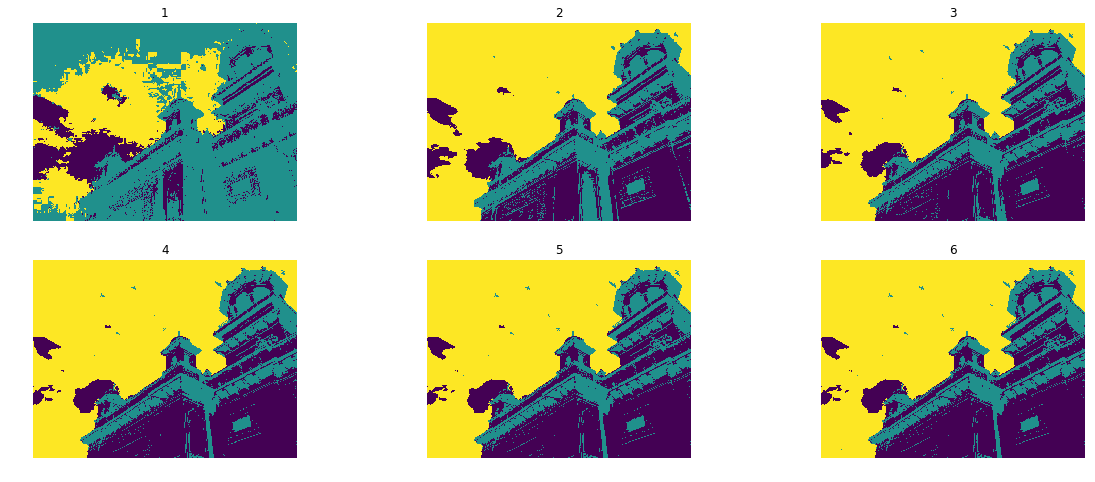

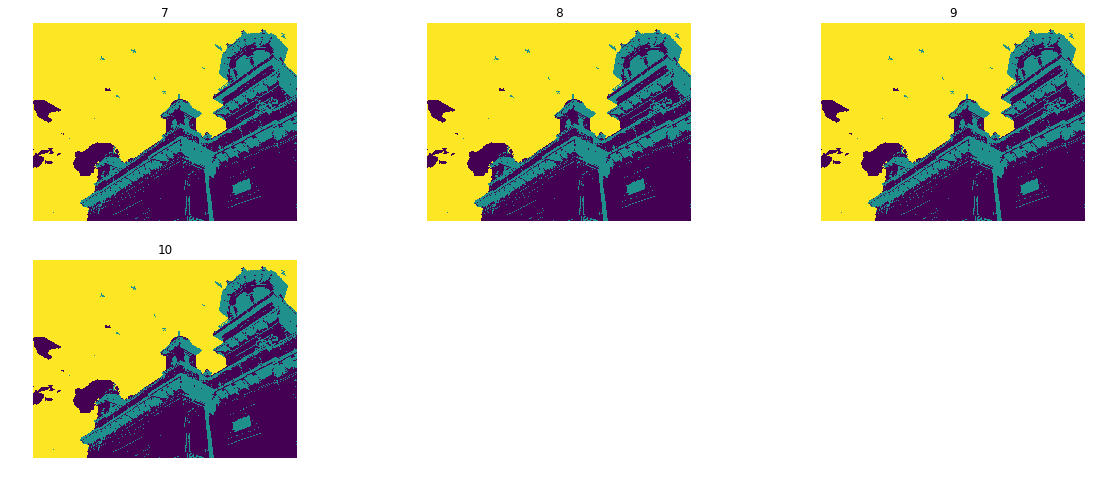

In [6]:
k_means(home, 3)

 ###### Implement the EM algorithm using only the numpy library. You can use opencv and matplotlib libraries only to read and display images. Apply it to the given image with 2 and 3 Gaussian components. Display the resulting segmented images for 10 iterations in both cases.

In [7]:
def gauss(x, mu, std):
    """
    Compute probability of the association between a sample and a Gaussian Distribution. 
    -----
    args x: the sample. 
    args mu: the mean of the Gaussian distribution. 
    args std: the standard deviation of the Gaussian distribution. 
    -----
    returns: the probability of the association. 
    """
    return np.linalg.norm(math.e**(-0.5 * np.power((x-mu)/std, 2)) / (math.sqrt(2*math.pi) * std), axis=-1)

def em(img, k, iter=10):
    h, w, ch = img.shape
    mus = np.random.random((k, ch)) * 255.0
    probs = np.full((k), (1.0 / k))
    std = np.full((k, ch), (255.0 / k))
    evol = []
    for it in range(iter):
        print("iteration ", it)
        print("mus: \n", mus)
        print("std: \n", std)
        print("probs: \n", probs)
        
        # E-step
        exp = np.empty(shape=(h, w, k))
        for i in range(h):
            for j in range(w): 
                exp[i][j] = gauss(img[i][j], mus, std)
        
        denom = np.sum(exp * probs, axis=-1)
        denom = denom.reshape((h, w, 1))
        exp = exp / denom
        
        #draw clusters
        clusters = np.argmax(exp, axis=-1)
        evol.append(clusters)
        
        #M-step 
        for c in range(k): 
            e = 0
            for i in range(h):
                for j in range(w): 
                    e += exp[i, j, c] * img[i, j]
            mus[c] = e / np.sum(exp[:,:,c])
            curr = img[clusters==c]
            std[c] = np.sqrt(np.var(curr, axis=0))
            probs[c] = np.size(curr) / np.size(img)
            
    plot_figs(evol, max_col=3)

EM segmentation with two clusters.

iteration  0
mus: 
 [[ 18.13630436  74.74977065  25.61071953]
 [189.72233728  95.9582924   76.39591942]]
std: 
 [[127.5 127.5 127.5]
 [127.5 127.5 127.5]]
probs: 
 [0.5 0.5]
iteration  1
mus: 
 [[ 83.8037346  119.38137356 141.14582017]
 [ 98.93968154 128.09040283 141.32822131]]
std: 
 [[24.78550079 23.18972874 51.55378725]
 [40.36213594 31.66599528 40.20862299]]
probs: 
 [0.57073466 0.42926534]
iteration  2
mus: 
 [[ 87.46579741 121.43115675 141.14556802]
 [ 97.28426868 127.21643538 141.36908214]]
std: 
 [[41.63928748 25.54202423 53.59775719]
 [79.68486728 48.12872895 37.69877937]]
probs: 
 [0.57462056 0.42537944]
iteration  3
mus: 
 [[ 87.2395256  121.08369163 140.91073157]
 [ 97.93895763 127.9124844  141.71680143]]
std: 
 [[43.01099778 26.82290277 56.174847  ]
 [88.39978087 50.61160246 32.2698752 ]]
probs: 
 [0.57188924 0.42811076]
iteration  4
mus: 
 [[ 86.38916531 120.4026499  140.59500803]
 [ 98.86747578 128.69746407 142.13676804]]
std: 
 [[44.01336859 28.75783066 57.5862216 ]
 [8

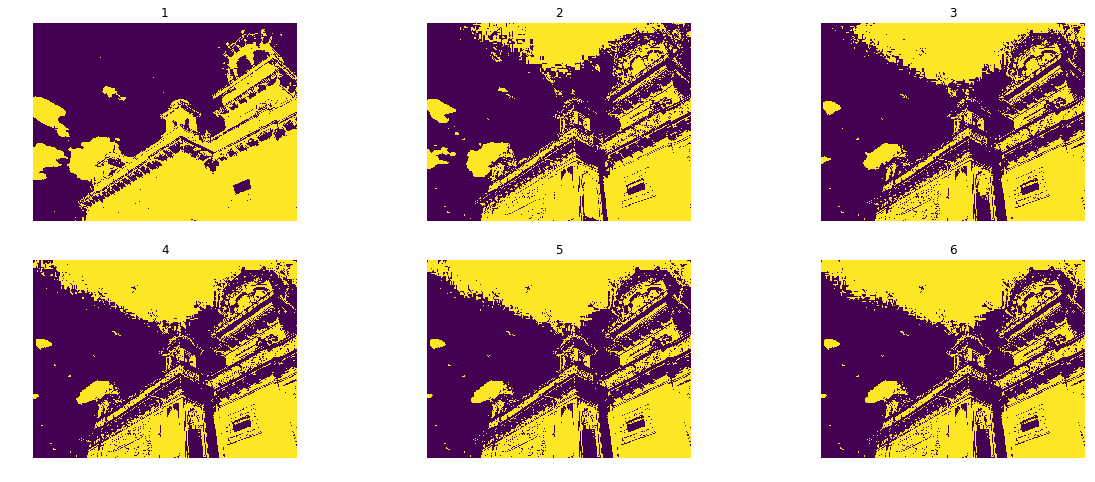

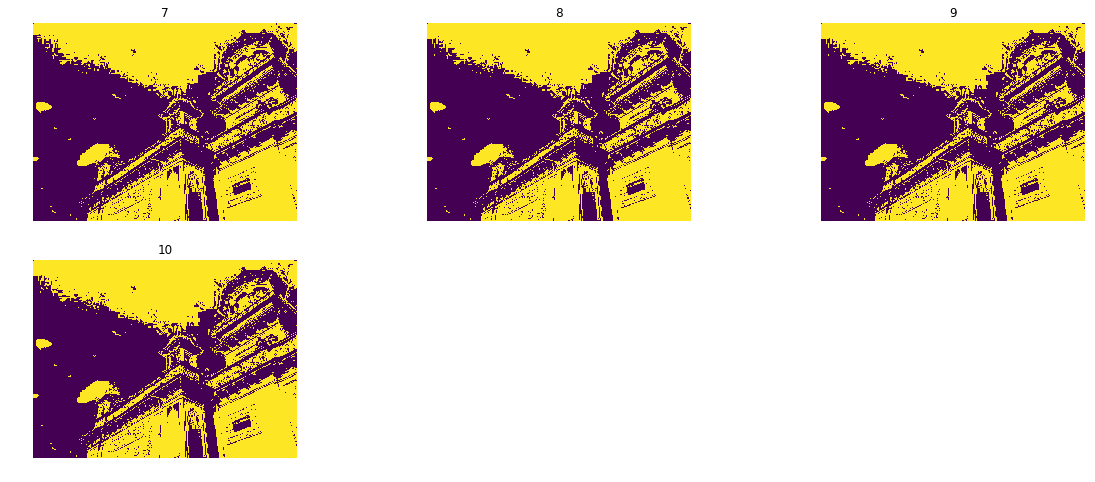

In [8]:
em(home, 2, 10)

EM segmentation with three clusters.

iteration  0
mus: 
 [[ 11.98212484 133.92465065 228.37891208]
 [169.18797379  52.98411467 244.15623469]
 [106.57833375 157.31847646 202.24540771]]
std: 
 [[85. 85. 85.]
 [85. 85. 85.]
 [85. 85. 85.]]
probs: 
 [0.33333333 0.33333333 0.33333333]
iteration  1
mus: 
 [[ 83.76961124 120.3763983  143.31019388]
 [ 95.13531524 124.32367663 137.86240236]
 [ 96.1625898  126.84104093 142.08341694]]
std: 
 [[15.50257631 21.16351005 40.99303001]
 [15.42092622 14.56729636 18.7358866 ]
 [52.84750829 36.106149   44.466548  ]]
probs: 
 [0.42736308 0.02734884 0.54528809]
iteration  2
mus: 
 [[ 89.01825978 123.09898998 142.67304968]
 [103.81287107 131.62919656 142.23455187]
 [ 93.15368552 124.07851515 139.90505519]]
std: 
 [[49.38296078 29.22275092 44.41663766]
 [68.12153771 36.50016782 39.01656413]
 [70.35008901 66.72430934 71.96501005]]
probs: 
 [0.3465271  0.53164673 0.12182617]
iteration  3
mus: 
 [[ 87.28220458 121.18959542 140.91948325]
 [ 94.60931159 126.16070811 142.31581566]
 [ 91.58908979 121.4

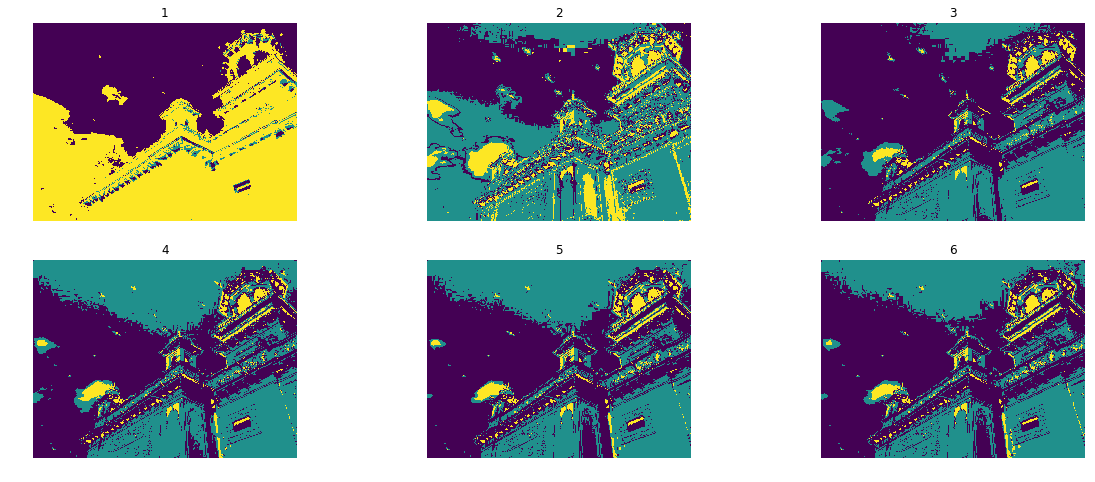

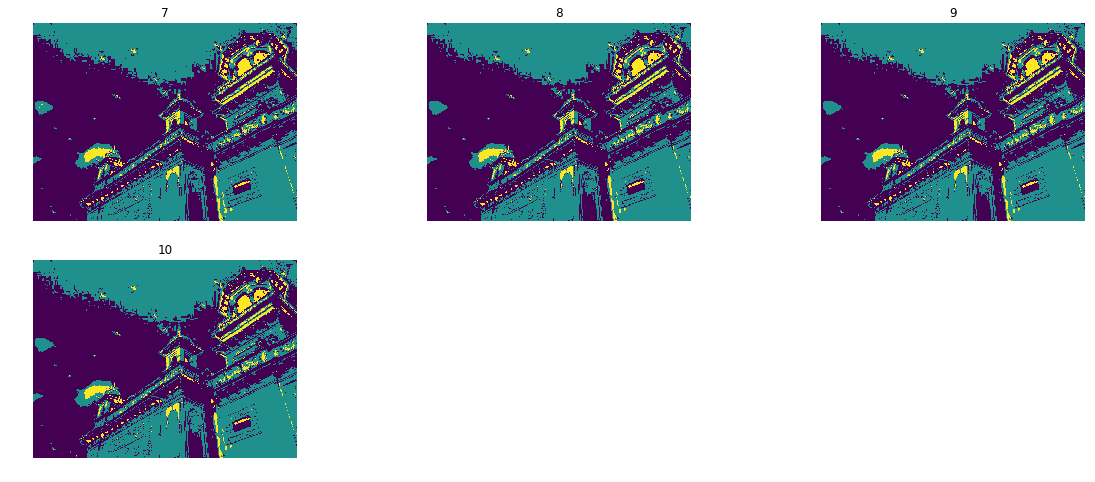

In [9]:
em(home, 3, 10)

###### Under what data distribution conditions would K-means and EM give the same solution, provided similar initializations?

K-means and EM give the same solution when the data are scattered in really defined and separated clustered. This is because there is less overlapping between Gaussian distribution curves, so the data can be better classified with high confidence and probability rate. At the same time, such data distribution defines clear boundaries for each 'neighborhood' in the cases of K-means. 

### 1.2 Normalized graph-cut and Mean-Shift segmentation

###### Segment the given image using normalized graph-cuts. Vary the following parameters (try several values of each parameter): compactness and n segments (slic function), thresh (cut normalized function). Display segmentation results for several parameters and state their effect on the output.

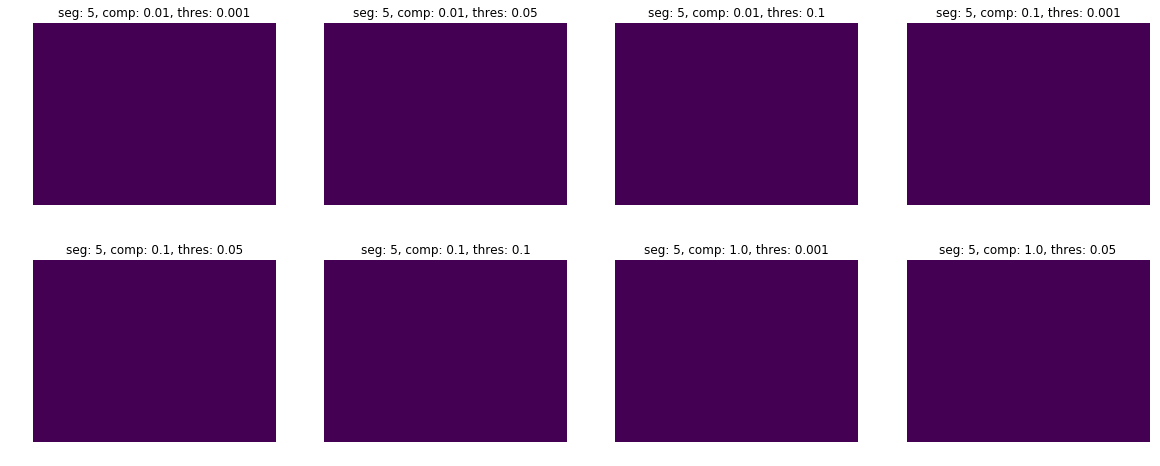

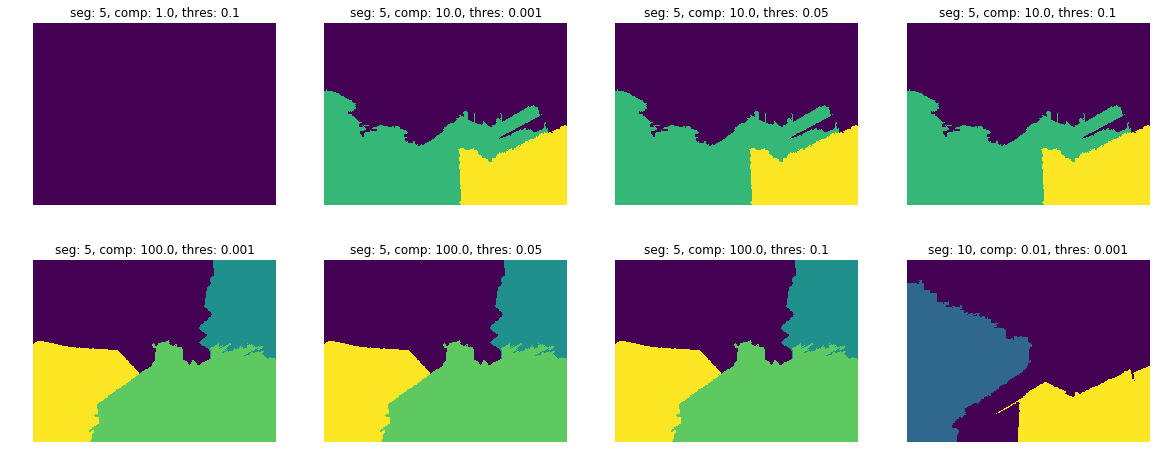

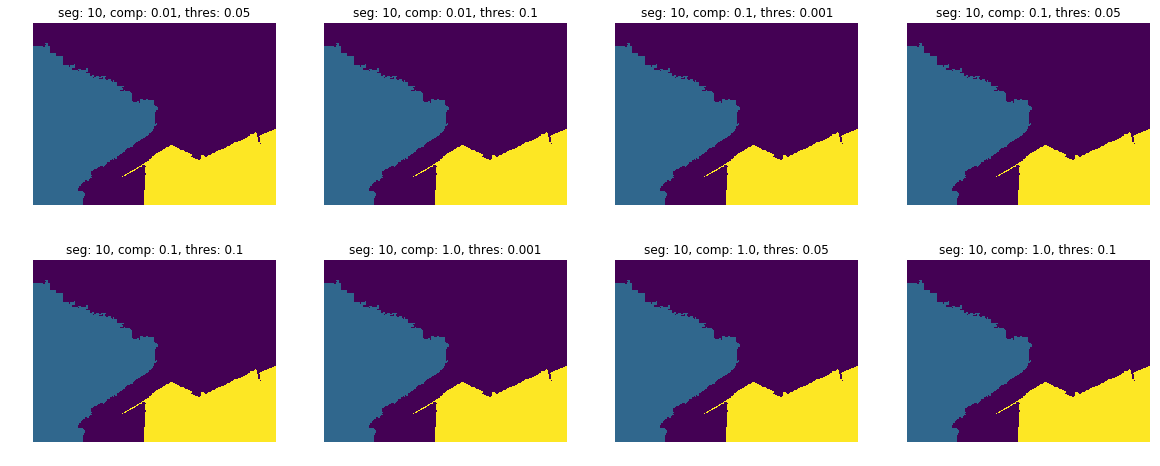

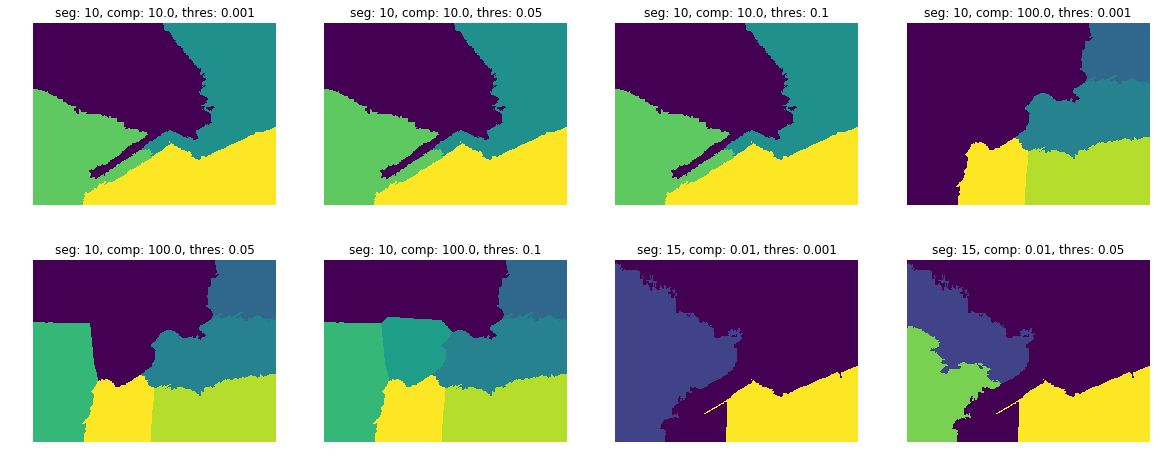

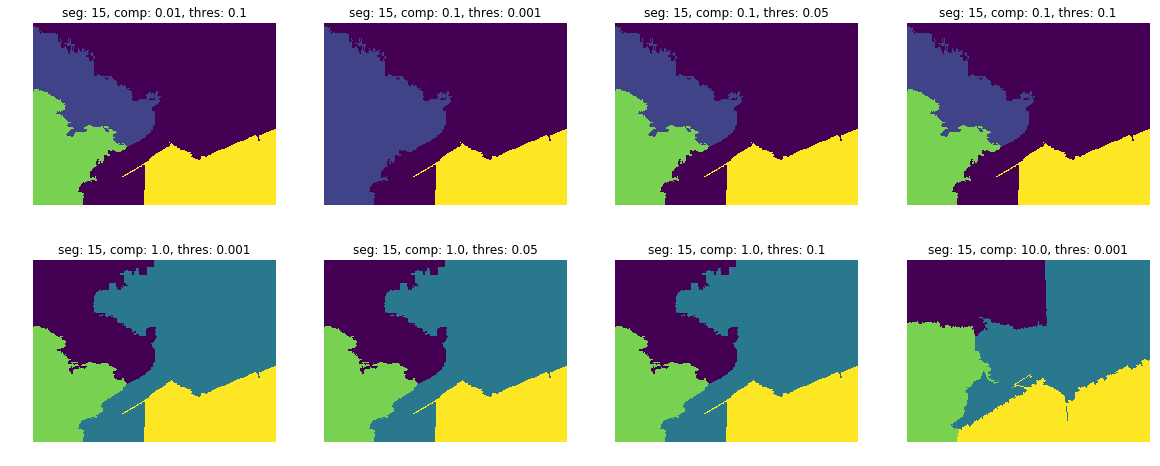

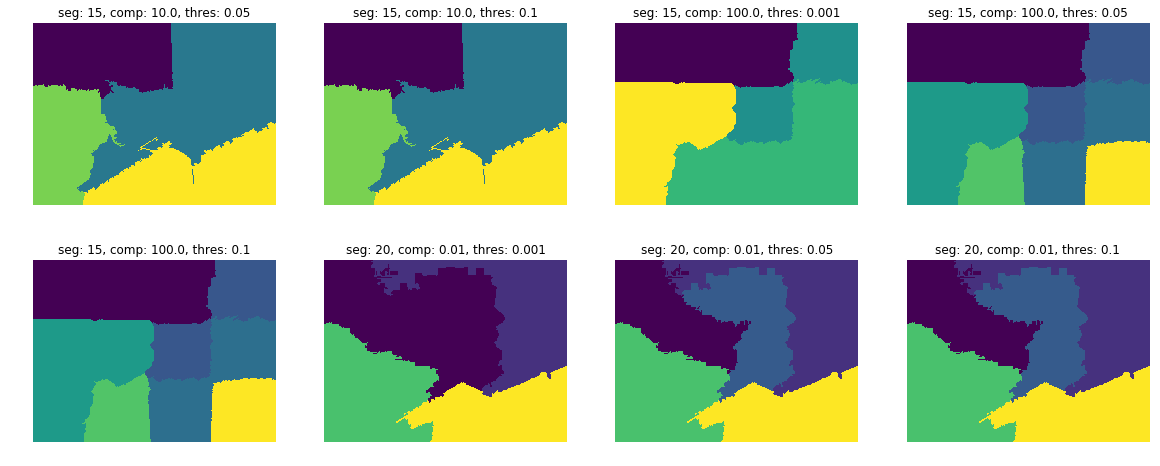

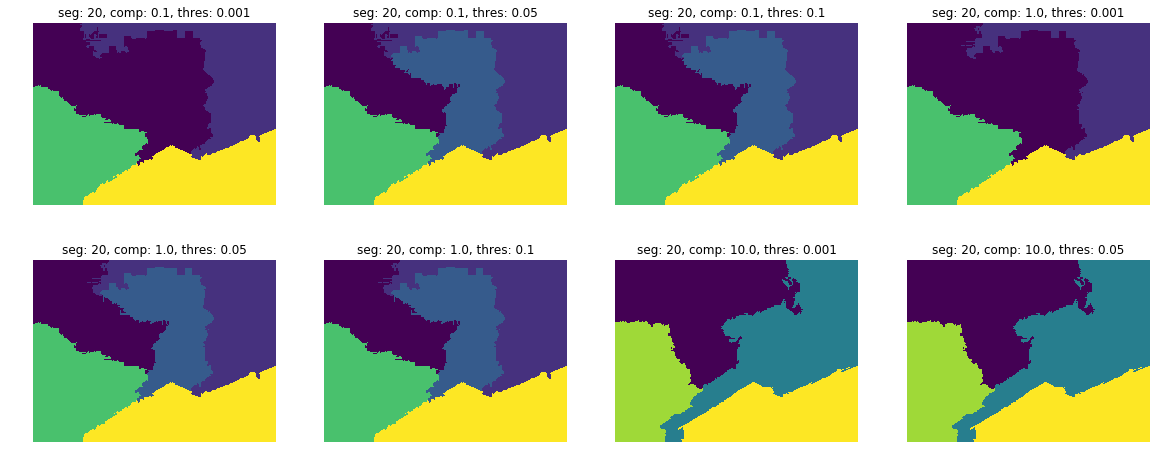

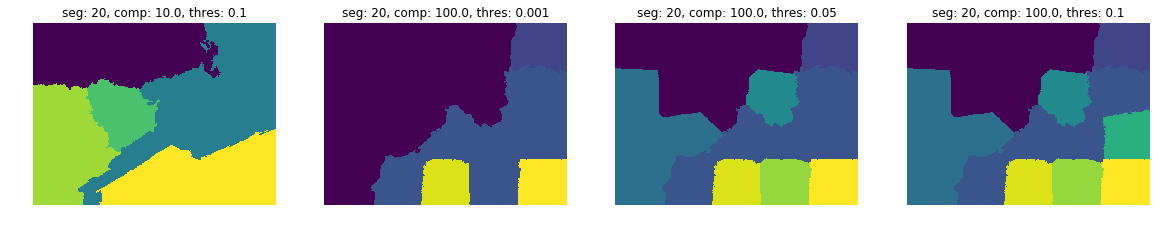

In [10]:
segments = [5, 10, 15, 20]
compactness = [0.01 * 10 ** (i) for i in range(5)] #5
thresholds = [0.001, 0.05, 0.1] #3

pictures = []
title = []

for seg in segments: 
    for comp in compactness: 
        for thres in thresholds: 
            labels = segmentation.slic(home, n_segments=seg, compactness=comp)
            rag = graph.rag_mean_color(home, labels, mode='similarity')
            res = graph.cut_normalized(labels, rag, thres)
            pictures.append(res)
            title.append("seg: {}, comp: {}, thres: {}".format(seg, comp, thres))
plot_figs(pictures, title)

Effect of parameters on the results: 

<ul>
    <li> <b>Compactness </b> </li>
    
This parameter determines the tradeoff of the model between the color similarity and proximity of the clusters. A higher compactness allocates more weight to space proximity, and less weight to color proximity. This means that the superpixels are more cubed. In our results, we can see that at `comp = 0.01`, the segmentation is delimits the shape of the castle better. However, when `comp = 100`, the boundaries are less defined, as the pixels are clustered with their neighbord more, which makes the segmentation more 'bulky'. 
</ul>

<ul>
    <li> <b>n-segmentation</b></li>
This simply defines the number of clusters in the output image.

</ul>

<ul>
    <li> <b>Threshold</b> </li>
This imposes a threshold on the max number of segmentation in a region. The normalization merges similar clusters in a region. The lower the threshold, the more regrouping of adjacent regions. 

</ul>